<a href="https://colab.research.google.com/github/saritmaitra/Markov_Model/blob/master/Markov_regime_switching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install hmmlearn
!pip install pyforest
from pyforest import *
import datetime, pickle, copy
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
import matplotlib.pyplot as plt
%matplotlib inline  
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
!pip install quandl
import quandl
plt.style.use('ggplot')
from statistics import variance 
from random import randint
import scipy as sp
from scipy import stats
!pip install ffn
import ffn
from matplotlib import cm
import numpy as np
%matplotlib inline
from sklearn.preprocessing import scale # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, r2_score
import sklearn.mixture as mix
import math, pickle
from math import sqrt
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV, cross_validate
import warnings
import seaborn as sns
sns.set()
from hmmlearn.hmm import GaussianHMM
from random import randint
from sklearn import mixture
import itertools
from scipy import linalg
import matplotlib as mpl
warnings.filterwarnings("ignore")

     |████████████████████████████████| 368kB 8.3MB/s 
  Created wheel for pyforest: filename=pyforest-1.0.3-py2.py3-none-any.whl size=13715 sha256=7cd87020c152ff59b88d0cfd64a73a9631cff7fcbaea268005eb8bcec01df3cd
  Stored in directory: /root/.cache/pip/wheels/af/0b/39/340a7f15fc8d4ff5ab50847b28789afea04452a9d51b9721b5
Successfully built pyforest


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  Created wheel for ffn: filename=ffn-0.3.4-cp36-none-any.whl size=22814 sha256=5399f1282ea1d5b9003b64b2f970217ca2ca5dbbad07e671a868be4f0498bb13
  Stored in directory: /root/.cache/pip/wheels/20/08/4d/921180e81279d147cb6399fe1e194f2c67a796df86f9f4c5fe
Successfully built ffn


/usr/local/lib/python3.6/dist-packages/ffn/core.py:27: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
import pandas_datareader as web
df = web.DataReader('^IXIC', data_source = 'yahoo', start = '2000-01-01')

print(f'Nasdaq Composite Index:')
print(df.head())
print('\n')
print(df.shape)

Nasdaq Composite Index:
                   High          Low         Open        Close      Volume    Adj Close
Date                                                                                   
2000-01-03  4192.189941  3989.709961  4186.189941  4131.149902  1510070000  4131.149902
2000-01-04  4073.250000  3898.229980  4020.000000  3901.689941  1511840000  3901.689941
2000-01-05  3924.209961  3734.870117  3854.350098  3877.540039  1735670000  3877.540039
2000-01-06  3868.760010  3715.620117  3834.439941  3727.129883  1598320000  3727.129883
2000-01-07  3882.669922  3711.090088  3711.090088  3882.620117  1634930000  3882.620117


(5165, 6)


In [3]:
data = df[['High','Low','Open','Adj Close', 'Volume']]
data['returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift())
data.dropna(inplace=True)
data.tail()

,High,Low,Open,Adj Close,Volume,returns
Date,,,,,,
2020-07-08,10494.629883,10350.959961,10409.349609,10492.500000,3999180000,0.014265
2020-07-09,10578.099609,10379.910156,10563.719727,10547.750000,3992920000,0.005252
2020-07-10,10622.349609,10447.009766,10545.910156,10617.440430,3509810000,0.006585
2020-07-13,10824.780273,10368.040039,10729.919922,10390.839844,4822050000,-0.021573
2020-07-14,10497.833984,10182.460938,10310.299805,10488.577148,3914893053,0.009362


count     5164.000000
mean      3613.589574
std       2078.287831
min       1114.109985
25%       2091.432495
50%       2677.755005
75%       4783.157593
max      10617.440430
Name: Adj Close, dtype: float64

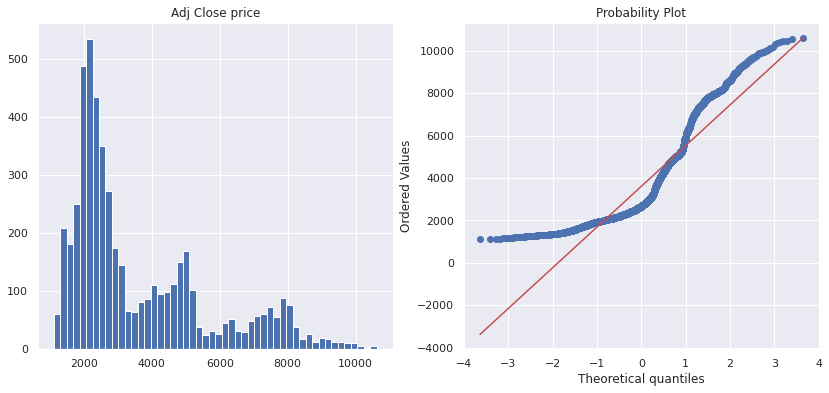

In [4]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
data['Adj Close'].hist(bins=50)
plt.title('Adj Close price')
plt.subplot(1,2,2)
stats.probplot(data['Adj Close'], plot=plt);
data['Adj Close'].describe().T

In [5]:
from statsmodels.tsa.stattools import adfuller

adfuller(data['returns'].dropna())

(-12.687724838307336,
 1.149894746198741e-23,
 33,
 5130,
 {'1%': -3.4316253557783787,
  '10%': -2.5670699897784313,
  '5%': -2.862103572487834},
 -27968.33177316487)

In [6]:
data['state'] = data['returns'].apply(lambda x: 'up' if (x > 0.001)\
else ('down' if (x < -0.001)\
else 'no_change'))
data.tail()

,High,Low,Open,Adj Close,Volume,returns,state
Date,,,,,,,
2020-07-08,10494.629883,10350.959961,10409.349609,10492.500000,3999180000,0.014265,up
2020-07-09,10578.099609,10379.910156,10563.719727,10547.750000,3992920000,0.005252,up
2020-07-10,10622.349609,10447.009766,10545.910156,10617.440430,3509810000,0.006585,up
2020-07-13,10824.780273,10368.040039,10729.919922,10390.839844,4822050000,-0.021573,down
2020-07-14,10497.833984,10182.460938,10310.299805,10488.577148,3914893053,0.009362,up


In [7]:
data['prev_state'] = data['state'].shift(1)
data.tail()

,High,Low,Open,Adj Close,Volume,returns,state,prev_state
Date,,,,,,,,
2020-07-08,10494.629883,10350.959961,10409.349609,10492.500000,3999180000,0.014265,up,down
2020-07-09,10578.099609,10379.910156,10563.719727,10547.750000,3992920000,0.005252,up,up
2020-07-10,10622.349609,10447.009766,10545.910156,10617.440430,3509810000,0.006585,up,up
2020-07-13,10824.780273,10368.040039,10729.919922,10390.839844,4822050000,-0.021573,down,up
2020-07-14,10497.833984,10182.460938,10310.299805,10488.577148,3914893053,0.009362,up,down


In [8]:
state_space = data[['prev_state', 'state']]
state_space_matrix = data.groupby(['prev_state', 'state']).size().unstack()
state_space_matrix

state,down,no_change,up
prev_state,,,
down,903,152,1091
no_change,180,43,234
up,1062,262,1236


In [9]:
print(state_space_matrix.sum())

state
down         2145
no_change     457
up           2561
dtype: int64


In [10]:
transition_matrix = state_space_matrix.apply(lambda x: x/float(x.sum()), axis=1)
transition_matrix

state,down,no_change,up
prev_state,,,
down,0.420783,0.070829,0.508388
no_change,0.393873,0.094092,0.512035
up,0.414844,0.102344,0.482812


In [11]:
print(transition_matrix.sum(axis=1))

prev_state
down         1.0
no_change    1.0
up           1.0
dtype: float64


In [12]:
from pprint import pprint 

# create a function that maps transition probability dataframe 
# to markov edges and weights

def _get_markov_edges(Q):
    edges = {}
    for col in Q.columns:
        for idx in Q.index:
            edges[(idx,col)] = Q.loc[idx,col]
    return edges

edges_wts = _get_markov_edges(transition_matrix)
pprint(edges_wts)

{('down', 'down'): 0.4207828518173346,
 ('down', 'no_change'): 0.07082945013979497,
 ('down', 'up'): 0.5083876980428704,
 ('no_change', 'down'): 0.3938730853391685,
 ('no_change', 'no_change'): 0.09409190371991247,
 ('no_change', 'up'): 0.5120350109409191,
 ('up', 'down'): 0.41484375,
 ('up', 'no_change'): 0.10234375,
 ('up', 'up'): 0.4828125}


Nodes:
['down', 'no_change', 'up']

Edges:


<IPython.core.display.Javascript object>

           0          1                                                  2
0       down       down  {'weight': 0.4207828518173346, 'label': 0.4207...
1       down  no_change  {'weight': 0.07082945013979497, 'label': 0.070...
2       down         up  {'weight': 0.5083876980428704, 'label': 0.5083...
3  no_change       down  {'weight': 0.3938730853391685, 'label': 0.3938...
4  no_change  no_change  {'weight': 0.09409190371991247, 'label': 0.094...
5  no_change         up  {'weight': 0.5120350109409191, 'label': 0.5120...
6         up       down        {'weight': 0.41484375, 'label': 0.41484375}
7         up  no_change        {'weight': 0.10234375, 'label': 0.10234375}
8         up         up          {'weight': 0.4828125, 'label': 0.4828125}
None


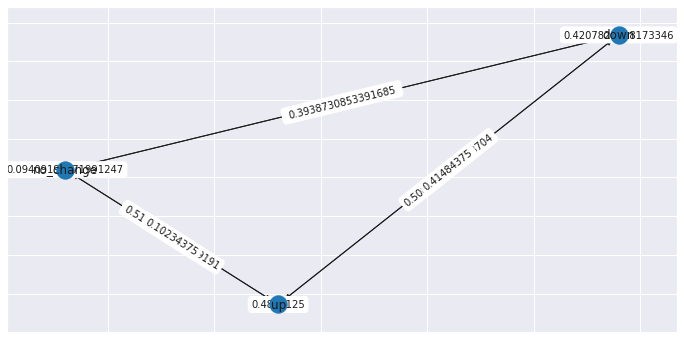

In [13]:
import networkx as nx

states = ['up', 'down', 'no_change']

# create graph object
G = nx.MultiDiGraph()

# nodes correspond to states
G.add_nodes_from(state_space_matrix)
print(f'Nodes:\n{G.nodes()}\n')

# edges represent transition probabilities
for k, v in edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)
print(f'Edges:')
pprint(pd.DataFrame(G.edges(data=True)))    

plt.figure(figsize=(12,6))
pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='dot')
print(nx.draw_networkx(G, pos))

# create edge labels for jupyter plot but is not necessary
edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G , pos, edge_labels=edge_labels)
nx.drawing.nx_pydot.write_dot(G, 'nasdaq_markov.dot')

                        Markov Switching Model Results                        
Dep. Variable:                returns   No. Observations:                 2500
Model:               MarkovRegression   Log Likelihood                8052.717
Date:                Wed, 15 Jul 2020   AIC                         -16081.435
Time:                        07:10:00   BIC                         -16011.546
Sample:                             0   HQIC                        -16056.062
                               - 2500                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0019      0.000      7.711      0.000       0.001       0.002
sigma2      2.644e-05    3.3e-06      8.016      0.0

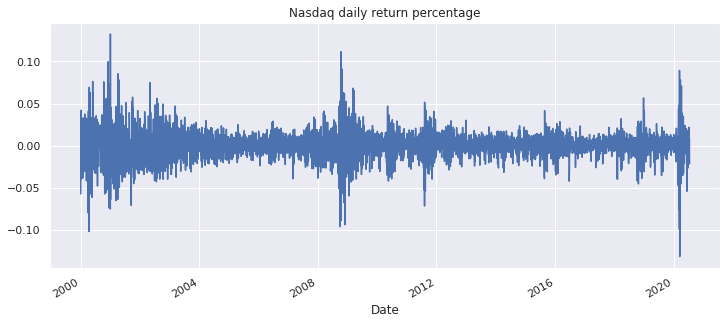

In [14]:
import statsmodels.api as sm

# Plot the data
data['returns'].plot(title='Nasdaq daily return percentage', figsize=(12,5))

data.dropna(inplace=True)

model = sm.tsa.MarkovRegression(data['returns'][-2500:], k_regimes=3,
                                switching_variance=True)


# launch the modelling process on the dataset
np.random.seed(123)
res_1 = model.fit(search_reps=50)

"""We specify that 50 random perturbations from the starting parameter 
vector are examined and the best one used as the actual starting parameters. 

Because of the random nature of the search, the random seed generator 
beforehand allow replication of the result"""

print(res_1.summary())

In [15]:
pred_1 = res_1.predict()
pred_1 = pd.DataFrame(pred_1).tail(20)
pred_1.rename(columns ={0: 'Predicted'}, inplace=True)
com_1 = pd.concat([pred_1, data['returns'].tail(20)], axis=1)
com_1 = com_1.reset_index()
com_1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Date,Predicted,returns
0,2020-06-16,-0.000710,0.017313
1,2020-06-17,-0.000213,0.001480
2,2020-06-18,-0.000005,0.003276
3,2020-06-19,0.000040,0.000309
4,2020-06-22,-0.000040,0.011035
5,2020-06-23,-0.000114,0.007419
6,2020-06-24,-0.000281,-0.022176
7,2020-06-25,-0.000269,0.010823
8,2020-06-26,-0.000292,-0.026276
9,2020-06-29,-0.000210,0.011913


In [16]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=com_1['Date'],y=com_1['returns'],
                         name="Actual returns"))

fig.add_trace(go.Scatter(x=com_1['Date'],y=com_1['Predicted'],
                         name="Predicted return"))

fig.update_layout(title="Nasdaq Actual vs Predicted returns",
   yaxis_title="Price ($)",
    font=dict(family="Courier New, monospace",size=18,color="#7f7f7f"))
fig.update_layout(autosize=False,width=800,height=400,)
fig.update_layout(legend_orientation="h")
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

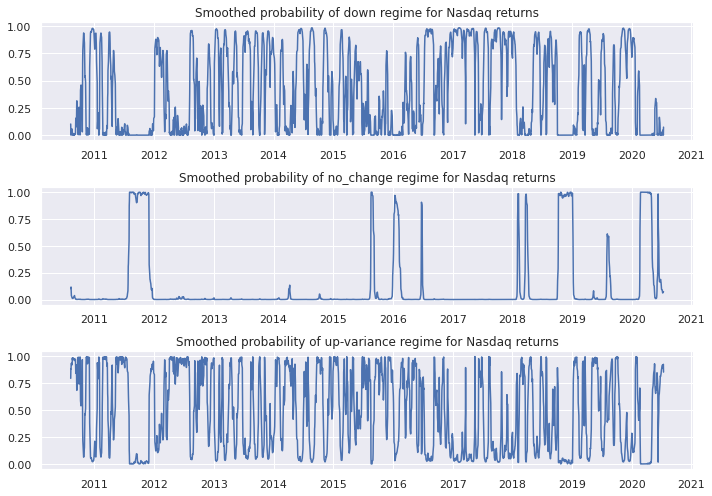

In [17]:
fig, axes = plt.subplots(3, figsize=(10,7))
ax = axes[0]
ax.plot(res_1.smoothed_marginal_probabilities[0])
#ax.fill_between(data['returns'].index, 0,  where=data['returns'].values, color='gray', alpha=0.3)
ax.set(title='Smoothed probability of down regime for Nasdaq returns')
ax = axes[1]
ax.plot(res_1.smoothed_marginal_probabilities[1])
ax.set(title='Smoothed probability of no_change regime for Nasdaq returns')
ax = axes[2]
ax.plot(res_1.smoothed_marginal_probabilities[2])
ax.set(title='Smoothed probability of up-variance regime for Nasdaq returns')
fig.tight_layout()

In [18]:
print(res_1.expected_durations)

[11.57806355 23.87768928 11.80404399]


In [22]:
data['volume_gap'] = np.log(data['Volume'] / data['Volume'].shift()) 
data['daily_change'] = (data['Adj Close'] - data['Open']) / data['Open']
data['fract_high'] = (data['High'] - data['Open']) / data['Open']
data['fract_low'] = (data['Open'] - data['Low']) / data['Open']
data['forecast_variable'] = (data['Adj Close'].shift(-1) - data['Open'])
data.dropna(inplace=True)
data = data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]
endog = data['forecast_variable'][-2500:]
exog = data [['volume_gap', 'daily_change', 'fract_high', 'fract_low']][-2500:]


In [23]:
# Fit the 2-regime model
mod_2 = sm.tsa.MarkovRegression(
    endog=endog, k_regimes=3, exog=exog)
res_2 = mod_2.fit(search_reps=50)
print(res_2.summary())


                        Markov Switching Model Results                        
Dep. Variable:      forecast_variable   No. Observations:                 2500
Model:               MarkovRegression   Log Likelihood              -13938.776
Date:                Wed, 15 Jul 2020   AIC                          27921.552
Time:                        07:13:19   BIC                          28049.681
Sample:                             0   HQIC                         27968.068
                               - 2500                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.3902      3.444      7.953      0.000      20.640      34.141
x1            23.0335      7.310      3.151      0.0

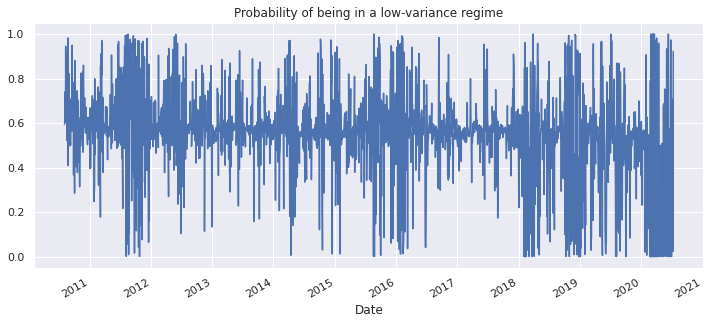

In [24]:
res_2.smoothed_marginal_probabilities[0].plot(
    title='Probability of being in a low-variance regime', figsize=(12,5));

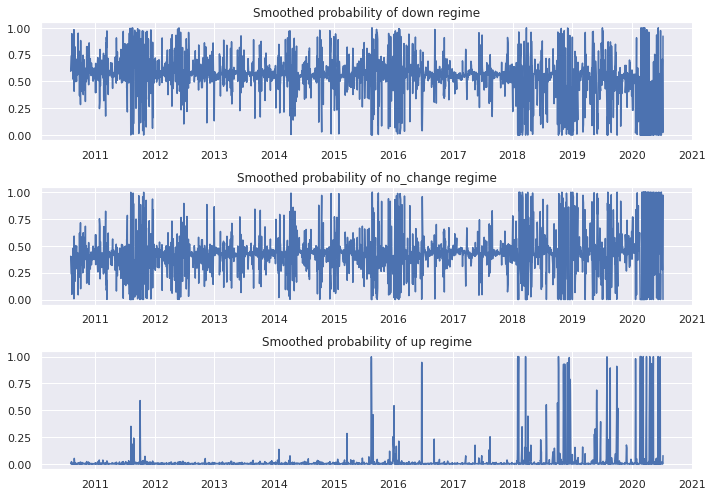

In [25]:
fig, axes = plt.subplots(3, figsize=(10,7))

ax = axes[0]
ax.plot(res_2.smoothed_marginal_probabilities[0])
ax.set(title='Smoothed probability of down regime')

ax = axes[1]
ax.plot(res_2.smoothed_marginal_probabilities[1])
ax.set(title='Smoothed probability of no_change regime')

ax = axes[2]
ax.plot(res_2.smoothed_marginal_probabilities[2])
ax.set(title='Smoothed probability of up regime')

plt.tight_layout()

In [26]:
!pip install probscale
import probscale

     |████████████████████████████████| 450kB 8.6MB/s 


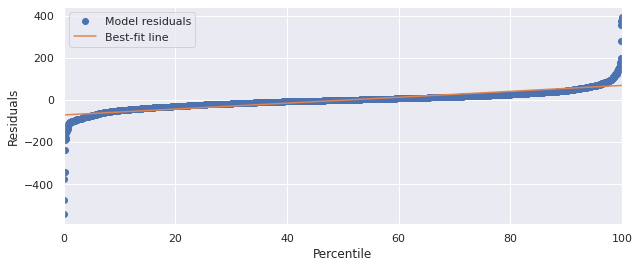

In [27]:
#qqpolot vs. normal distribution
fig, ax = plt.subplots(figsize=(10, 4))
plt.grid(True)
fig = probscale.probplot(res_2.resid, ax=ax, plottype='pp', bestfit=True,
                         problabel='Percentile', datalabel='Residuals',
                         scatter_kws=dict(label='Model residuals'),
                         line_kws=dict(label='Best-fit line'))
ax.legend(loc='upper left')
plt.show()

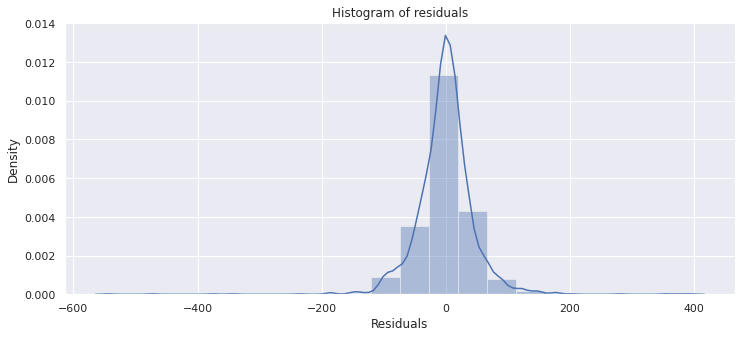

In [28]:
import seaborn as sns
plt.figure(figsize=(12,5))

# Plot a simple histogram with binsize determined automatically
sns.distplot(res_2.resid, 20)
plt.title('Histogram of residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [29]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['Lagrange multiplier statistic', 'p-value','f-value', 'f p-value']
results1 = sms.acorr_breusch_godfrey(res_2, 10)
print(lzip(name, results1))

name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
JB, JBpv,skw,kurt = sm.stats.stattools.jarque_bera(res_2.resid)
print(lzip(name, results1))

[('Lagrange multiplier statistic', 82.43000633332359), ('p-value', 1.6738425164882374e-13), ('f-value', 6.4952827211699615), ('f p-value', 5.709901720611495e-10)]
[('Jarque-Bera', 82.43000633332359), ('Chi^2 two-tail prob.', 1.6738425164882374e-13), ('Skew', 6.4952827211699615), ('Kurtosis', 5.709901720611495e-10)]


In [30]:
print(res_2.expected_durations)

[2.41729803 1.86885065 1.50248379]


In [31]:
print(res_2.conf_int())

                     0             1
p[0->0]       0.138054      1.034576
p[1->0]       0.131647      0.894559
p[2->0]      -0.321171      1.038289
p[0->1]      -0.047012      0.841605
p[1->1]       0.160719      0.769105
p[2->1]       0.005943      0.608068
const[0]     20.639830     34.140588
const[1]    -30.457556    -10.810333
const[2]   -416.631575    233.413676
x1[0]         8.706589     37.360490
x1[1]       -88.908642    -21.121729
x1[2]        22.317029    190.072310
x2[0]     -6089.547127   3261.030045
x2[1]      1279.924813   3978.540417
x2[2]     10776.341361  16190.253847
x3[0]     -1492.531381   4855.642855
x3[1]      7115.871685   8896.866766
x3[2]    -25422.500232   6722.222217
x4[0]     -9117.299555  -6343.799441
x4[1]       811.587561   2989.371781
x4[2]     -1382.918344   4907.968298
sigma2     2349.187458   3606.550111


In [32]:
predict = res_2.predict()
predict = pd.DataFrame(predict.tail(20))
predict.rename(columns ={0: 'Predicted'}, inplace=True)
predict.rename(columns ={0: 'Predicted'}, inplace=True)
combine = pd.concat([predict, data['forecast_variable'].tail(20)], axis=1)
combine = combine.reset_index()
combine

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Date,Predicted,forecast_variable
0,2020-06-12,57.393843,10.149414
1,2020-06-15,346.248265,468.969727
2,2020-06-16,-37.952733,-39.250000
3,2020-06-17,9.104779,-0.259766
4,2020-06-18,36.586059,53.639648
5,2020-06-19,-36.983552,14.350586
6,2020-06-22,122.245753,185.879883
7,2020-06-23,-145.173498,-221.660156
8,2020-06-24,-96.701614,-75.919922
9,2020-06-25,-41.784781,-142.140625


In [33]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=combine['Date'],y=combine['forecast_variable'],
                         name="Actual Values (Adj Close"))

fig.add_trace(go.Scatter(x=combine['Date'],y=combine['Predicted'],
                         name="Predicted return"))

fig.update_layout(title="Nasdaq Actual vs Predicted values",
   yaxis_title="Price ($)",
    font=dict(family="Courier New, monospace",size=18,color="#7f7f7f"))
fig.update_layout(autosize=False,width=800,height=500,)
fig.update_layout(legend_orientation="h")
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>